
----


# **Task 2 - Exploratory Data Analysis - Customer Churn Prediction**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">Author: Muhammad Adil Naeem</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-green?style=for-the-badge&logo=github)](https://github.com/muhammadadilnaeem) [![Twitter/X](https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter)](https://twitter.com/adilnaeem0) [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-adil-naeem-26878b2b9/)  

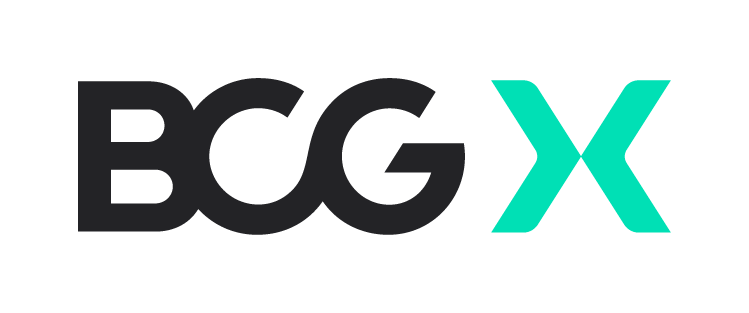

## **Understanding Problem Statement**
- This Notebook aims to understand the problem statement of Customer Churn by analyzing dataset's provided by Client.
- Customer churn refers to the rate at which customers stop doing business with a company over a specific period. It's a key metric that indicates customer retention and satisfaction, with a higher churn rate signaling potential issues in the product, service, or customer experience.

## **Meta Data**

Client Provided us 2 Datasets named as `client_data.csv` and `price_data.csv`. Our Aim is to explore, analyze and provide findings.

- **Meta Data of `client_data.csv` (Customer data such as usage, sign up date, forecasted usage etc).**

| **Column**                     | **Description**                                                       |
|--------------------------------|-----------------------------------------------------------------------|
| `id`                           | Client company identifier                                             |
| `activity_new`                 | Category of the company’s activity                                    |
| `channel_sales`                | Code of the sales channel                                             |
| `cons_12m`                     | Electricity consumption of the past 12 months                         |
| `cons_gas_12m`                 | Gas consumption of the past 12 months                                 |
| `cons_last_month`              | Electricity consumption of the last month                             |
| `date_activ`                   | Date of activation of the contract                                    |
| `date_end`                     | Registered date of the end of the contract                            |
| `date_modif_prod`              | Date of the last modification of the product                          |
| `date_renewal`                 | Date of the next contract renewal                                     |
| `forecast_cons_12m`            | Forecasted electricity consumption for next 12 months                 |
| `forecast_cons_year`           | Forecasted electricity consumption for the next calendar year         |
| `forecast_discount_energy`     | Forecasted value of current discount                                  |
| `forecast_meter_rent_12m`      | Forecasted bill of meter rental for the next 2 months                 |
| `forecast_price_energy_off_peak`| Forecasted energy price for 1st period (off peak)                     |
| `forecast_price_energy_peak`   | Forecasted energy price for 2nd period (peak)                         |
| `forecast_price_pow_off_peak`  | Forecasted power price for 1st period (off peak)                      |
| `has_gas`                      | Indicates if the client is also a gas client                          |
| `imp_cons`                     | Current paid consumption                                              |
| `margin_gross_pow_ele`         | Gross margin on power subscription                                    |
| `margin_net_pow_ele`           | Net margin on power subscription                                      |
| `nb_prod_act`                  | Number of active products and services                                |
| `net_margin`                   | Total net margin                                                      |
| `num_years_antig`              | Antiquity of the client (in number of years)                          |
| `origin_up`                    | Code of the electricity campaign the customer first subscribed to     |
| `pow_max`                      | Subscribed power                                                      |
| `churn`                        | Indicates if the client has churned over the next 3 months            |


- **Meta Data of `price_data.csv`(variable and fixed pricing data).**

| **Field**           | **Description**                                      |
|---------------------|------------------------------------------------------|
| `id`                | Client company identifier                            |
| `price_date`        | Reference date                                       |
| `price_off_peak_var`| Price of energy for the 1st period (off peak)        |
| `price_peak_var`    | Price of energy for the 2nd period (peak)            |
| `price_mid_peak_var`| Price of energy for the 3rd period (mid peak)        |
| `price_off_peak_fix`| Price of power for the 1st period (off peak)         |
| `price_peak_fix`    | Price of power for the 2nd period (peak)             |
| `price_mid_peak_fix`| Price of power for the 3rd period (mid peak)         |


## **Objectives:**

We need to analyze:
- The data types of each column
- Descriptive statistics of the dataset
- Distributions of columns



------


## **Let's Start Exploring Data**

----

### **Importing Python Libraries**

In [39]:
import pandas as pd  # For data manipulation
import numpy as np   # for mathematical calculations
import matplotlib.pyplot as plt   # For data visualization
%matplotlib inline  
import seaborn as sns  # for advance data visualization
import warnings   # To ignore the warnings
warnings.filterwarnings('ignore')

#### **Load `client_data.csv`**

In [40]:
client_df = pd.read_csv(r'C:\Users\user\Downloads\BCGX Customer Churn Project\client_data.csv')

### **Let's Take a Look at first 5 rows of `client_data.csv`**

In [41]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


#### **Load `price_data.csv`**

In [42]:
price_df = pd.read_csv(r'C:\Users\user\Downloads\BCGX Customer Churn Project\price_data.csv')

### **Let's Take a Look at first 5 rows of `price_data.csv`**

In [43]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


-----

## **Descriptive Statistics**


----

### **Shape of client_data.csv**

In [44]:
client_df.shape

(14606, 26)

<div style="background-color: rgba(0, 255, 0, 0.2); border-radius: 10px; padding: 10px;">

- **Client Data Consist of 14096 rows and 26 columns.**

### **Check Missing Values in client_data.csv**

In [45]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

<div style="background-color: rgba(0, 255, 0, 0.2); border-radius: 10px; padding: 10px;">

- **No missing Values are present in `client_data.csv`**.

### **Check Unique Values in Each Column in `client_data.csv`**

In [46]:
client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


### **Detailed Information of client_data.csv**

In [47]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

<div style="background-color: rgba(255, 255, 0, 0.2); border-radius: 10px; padding: 15px;">

- **Total Entries:** 14,606 rows, indicating a sizable dataset.
- **Total Columns:** 26 columns, representing various attributes of the data.
- **Data Types:**
  - 8 columns are of type `object`, likely representing categorical data or strings.
  - 11 columns are of type `float64`, indicating continuous numerical data.
  - 7 columns are of type `int64`, indicating discrete numerical data.
- **Non-Null Values:** All columns have 14,606 non-null values, meaning there are no missing data points in any of the columns.
- **Memory Usage:** The DataFrame occupies approximately 2.9 MB of memory.
- **Key Columns:**
  - `id`: Likely a unique identifier for each entry.
  - `channel_sales`, `origin_up`, `has_gas`: Categorical data that may relate to customer segments or product characteristics.
  - `cons_12m`, `cons_gas_12m`, `cons_last_month`: Numerical data reflecting consumption metrics.
  - `forecast_*`: Several columns providing forecasted values, such as consumption, discounts, prices, and meter rents.
  - `margin_gross_pow_ele`, `margin_net_pow_ele`, `net_margin`: Indicators of financial performance.
  - `churn`: A binary or categorical column potentially indicating customer churn (0 or 1).

### **Statistical Description Of client_data.csv**

In [48]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


<div style="background-color: rgba(0, 255, 255, 0.2); border-radius: 10px; padding: 30px;">

### **Insights**

- **Data Volume**: The dataset consists of 14,606 rows and 26 columns, indicating a substantial amount of data for analysis.
  
- **Consumption Statistics**:
  - **Electricity Consumption (12 months)**: Average consumption is 159,220.3 kWh, with significant variance (standard deviation of 573,465.3 kWh).
  - **Gas Consumption (12 months)**: The average is 28,092.4 kWh, but many customers have zero gas consumption.
  - **Last Month Consumption**: The average is 16,090.27 kWh, with a wide range from 0 to 771,203 kWh.
  
- **Forecasts**:
  - **12-Month Consumption Forecast**: The average forecasted consumption is 1,868.61 kWh, showing a considerable difference from actual consumption figures.
  - **Forecast for the Year**: The mean forecast is 1,399.76 kWh, indicating lower expectations for future consumption.
  - **Energy Price Forecasts**: Off-peak energy prices average 0.137 units, peak prices 0.050 units, and power off-peak prices 43.13 units, with slight variation across the dataset.
  
- **Financial Margins**:
  - **Gross Margin (Electricity)**: Average gross margin is 24.56 units, with a range from 0 to 374.64 units.
  - **Net Margin**: Average net margin is 189.26 units, with a maximum value reaching 24,570.65 units, indicating a few highly profitable cases.
  
- **Customer Characteristics**:
  - **Years of Antigüedad**: Customers have an average of 5 years of service, with a range from 1 to 13 years.
  - **Churn Rate**: 9.72% of customers have churned, indicating room for improving retention strategies.
  
- **Product Activity**:
  - **Number of Active Products**: Most customers have 1 active product, with some having up to 32.
  
- **Max Power**: The average maximum power is 18.13 kW, ranging from 3.3 to 320 kW.
  
- **Missing Data**: No missing data is observed, ensuring the reliability of the dataset for further analysis.

### **Shape of price_data.csv**

In [49]:
price_df.shape

(193002, 8)

<div style="background-color: rgba(0, 255, 0, 0.2); border-radius: 10px; padding: 20px;">

- **Price Data Consist of 193002 rows and 8 columns.**

### **Check Missing Values in price_data.csv**

In [50]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

<div style="background-color: rgba(0, 255, 0, 0.2); border-radius: 10px; padding: 10px;">

- **No missing Values are present in `price_data.csv`**.

### **Check Unique Values in Each Column in `price_data.csv`**

In [51]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

### **Detailed Information of price_data.csv**

In [52]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


<div style="background-color: rgba(255, 255, 0, 0.2); border-radius: 10px; padding: 30px;">

#### **Insights**

- **Total Entries:** 193,002 rows of data, indicating a large dataset.
- **Columns:** The DataFrame contains 8 columns, comprising 2 object (string) types and 6 float64 (numeric) types.
- **Non-Null Values:** All columns have 193,002 non-null values, meaning there are no missing entries in any column.
- **Object Columns:**
  - `id`: Likely an identifier, unique for each row.
  - `price_date`: Represents dates, although stored as an object type.
- **Float64 Columns:**
  - `price_off_peak_var`, `price_peak_var`, `price_mid_peak_var`: Variable prices during different times (off-peak, peak, and mid-peak).
  - `price_off_peak_fix`, `price_peak_fix`, `price_mid_peak_fix`: Fixed prices during different times (off-peak, peak, and mid-peak).
- **Memory Usage:** The DataFrame consumes approximately 11.8 MB of memory, indicating moderate memory usage.

### **Statistical Description Of price_data.csv**

In [53]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


<div style="background-color: rgba(0, 255, 255, 0.2); border-radius: 10px; padding: 30px;">

#### **Insights**

- **Dataset Overview:**
  - Total observations: 193,002 for each price variable (off-peak, peak, mid-peak, variable and fixed).

- **Variable Price Analysis:**
  - **Off-Peak:**
    - Mean price: 0.141
    - Standard deviation: 0.025 (low variation)
    - Minimum price: 0.000
    - Maximum price: 0.281
    - 50% of prices are above 0.146
  - **Peak:**
    - Mean price: 0.055
    - Standard deviation: 0.050 (moderate variation)
    - Minimum price: 0.000
    - Maximum price: 0.230
    - 50% of prices are above 0.085
  - **Mid-Peak:**
    - Mean price: 0.030
    - Standard deviation: 0.036 (moderate variation)
    - Minimum price: 0.000
    - Maximum price: 0.114
    - 50% of prices are 0.000 or lower.

- **Fixed Price Analysis:**
  - **Off-Peak:**
    - Mean price: 43.334
    - Standard deviation: 5.410 (low variation)
    - Minimum price: 0.000
    - Maximum price: 59.445
    - 50% of prices are above 44.267
  - **Peak:**
    - Mean price: 10.623
    - Standard deviation: 12.842 (high variation)
    - Minimum price: 0.000
    - Maximum price: 36.491
    - 50% of prices are 0.000 or lower.
  - **Mid-Peak:**
    - Mean price: 6.410
    - Standard deviation: 7.774 (high variation)
    - Minimum price: 0.000
    - Maximum price: 17.458
    - 50% of prices are 0.000 or lower.

- **Key Observations:**
  - Variable prices tend to have lower averages and variations compared to fixed prices.
  - The distribution of prices shows that a significant proportion of prices are zero, especially in mid-peak and peak categories.
  - Off-peak fixed prices are consistently higher with less variation, indicating more stability compared to other categories.

----

## **Data Visulization**

----

## **`client_df`**

### **Let's Change data types Temporarily for Visualizations**

In [54]:
# Ensure relevant columns are in the correct data types
client_df['cons_12m'] = pd.to_numeric(client_df['cons_12m'], errors='coerce')
client_df['forecast_cons_12m'] = pd.to_numeric(client_df['forecast_cons_12m'], errors='coerce')
client_df['margin_gross_pow_ele'] = pd.to_numeric(client_df['margin_gross_pow_ele'], errors='coerce')
client_df['margin_net_pow_ele'] = pd.to_numeric(client_df['margin_net_pow_ele'], errors='coerce')
client_df['net_margin'] = pd.to_numeric(client_df['net_margin'], errors='coerce')
client_df['nb_prod_act'] = pd.to_numeric(client_df['nb_prod_act'], errors='coerce')
client_df['pow_max'] = pd.to_numeric(client_df['pow_max'], errors='coerce')
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], errors='coerce')

### **Churn Analysis:**

- **Churn Rate by Channel Sales**: Bar chart showing the churn rate across different sales channels (channel_sales).

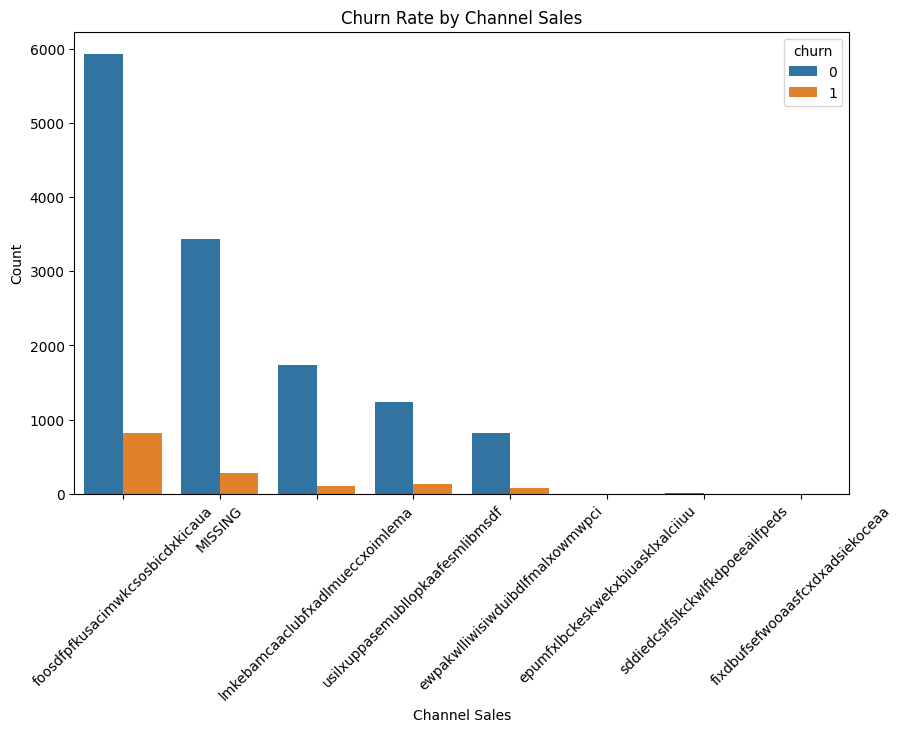

In [55]:
# 1. Churn Rate by Channel Sales
plt.figure(figsize=(10, 6))
sns.countplot(x='channel_sales', hue='churn', data=client_df)
plt.title('Churn Rate by Channel Sales')
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **Consumption Patterns:**

- **Yearly Consumption vs. Forecast**: Scatter plot comparing cons_12m with forecast_cons_12m.


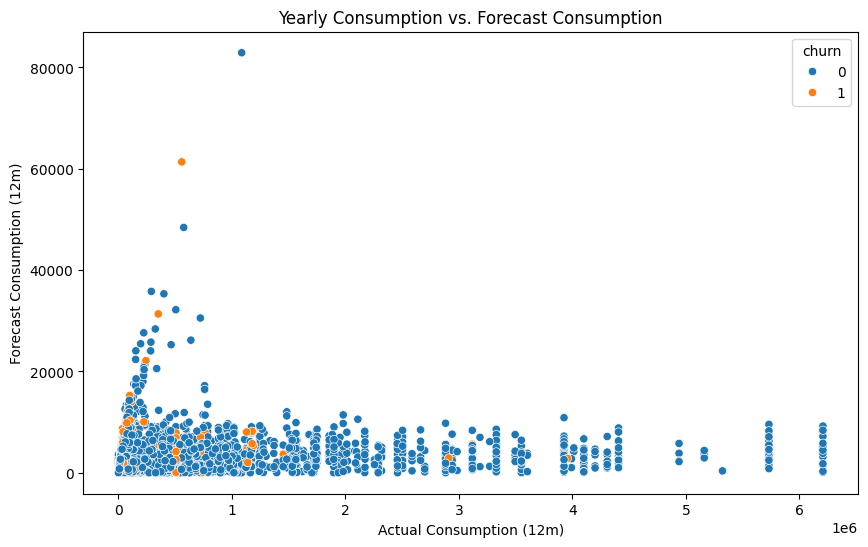

In [56]:
# 2. Yearly Consumption vs. Forecast
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cons_12m', y='forecast_cons_12m', hue='churn', data=client_df)
plt.title('Yearly Consumption vs. Forecast Consumption')
plt.xlabel('Actual Consumption (12m)')
plt.ylabel('Forecast Consumption (12m)')
plt.show()

### **Revenue and Margin Insights:**

- Gross vs. Net Margins: Scatter plot or joint plot of margin_gross_pow_ele against margin_net_pow_ele.

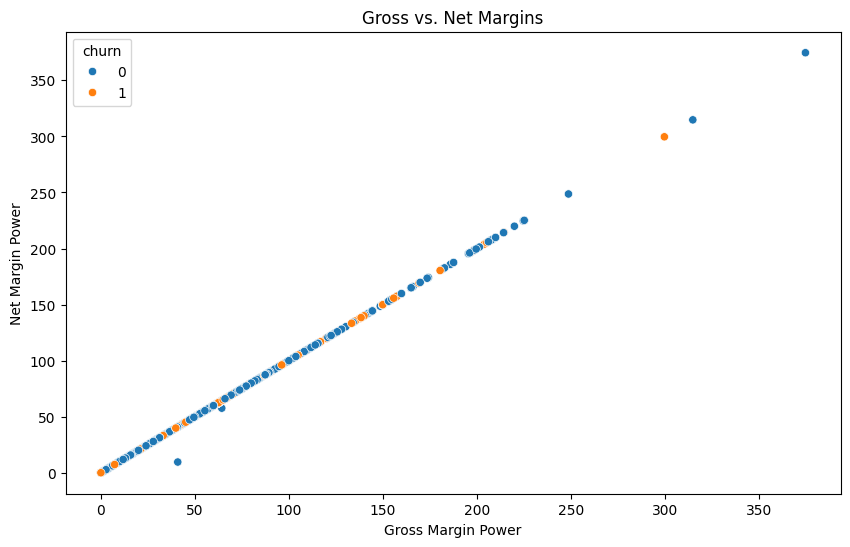

In [57]:
# 3. Gross vs. Net Margins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='margin_gross_pow_ele', y='margin_net_pow_ele', hue='churn', data=client_df)
plt.title('Gross vs. Net Margins')
plt.xlabel('Gross Margin Power')
plt.ylabel('Net Margin Power')
plt.show()

### **Time-based Analysis:**

- **Customer Activation Over Time:** Line plot showing the number of activations (date_activ) over the years.

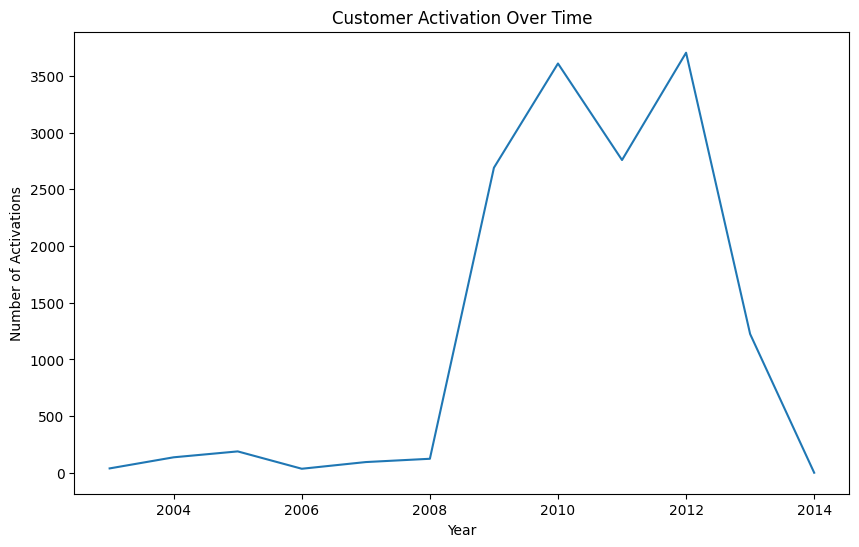

In [58]:
# 4. Customer Activation Over Time
plt.figure(figsize=(10, 6))
client_df['date_activ'].dt.year.value_counts().sort_index().plot(kind='line')
plt.title('Customer Activation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Activations')
plt.show()

### **Customer Tenure:**

- **Net Margin by Customer Tenure**: Scatter plot or line plot showing net_margin over num_years_antig.

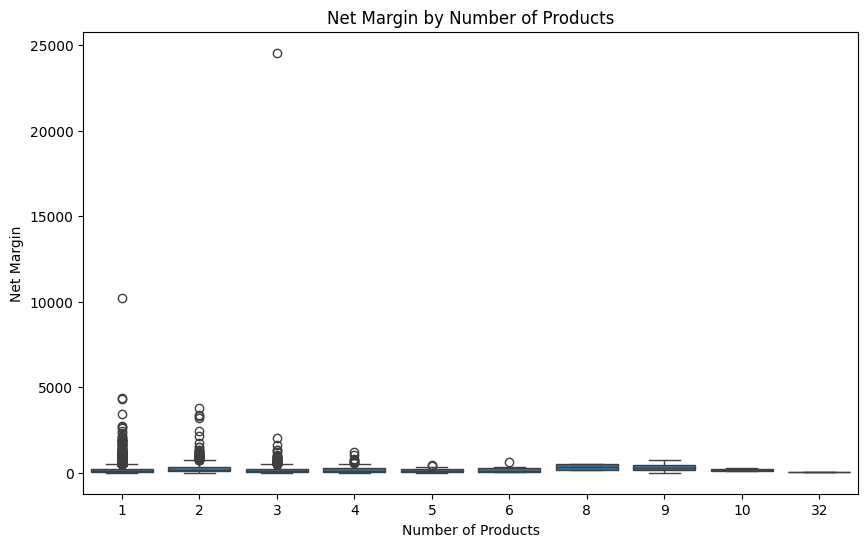

In [59]:
# 5. Net Margin by Number of Products
plt.figure(figsize=(10, 6))
sns.boxplot(x='nb_prod_act', y='net_margin', data=client_df)
plt.title('Net Margin by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Net Margin')
plt.show()

### **Feature Interactions:**

- **Power Max vs. Net Margin**: Scatter plot showing pow_max against net_margin, possibly color-coded by churn.

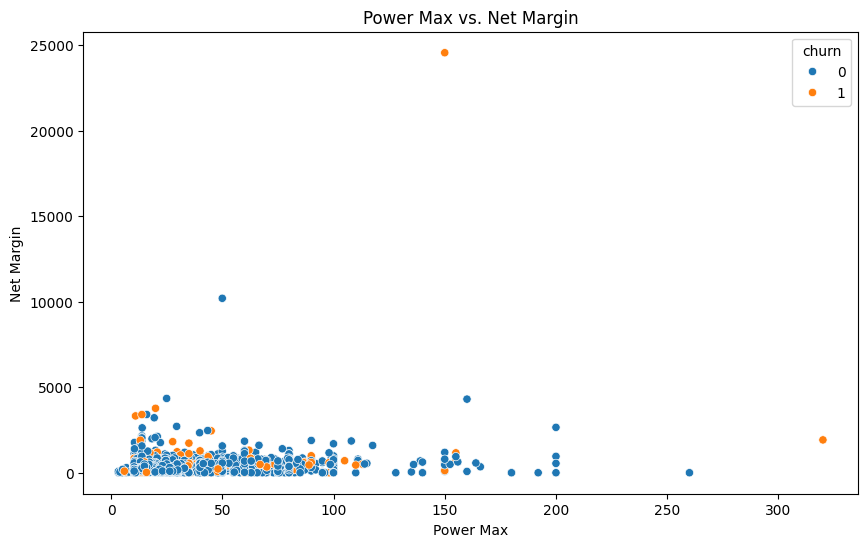

In [60]:
# 6. Power Max vs. Net Margin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pow_max', y='net_margin', hue='churn', data=client_df)
plt.title('Power Max vs. Net Margin')
plt.xlabel('Power Max')
plt.ylabel('Net Margin')
plt.show()

The plot that is generated shows a stacked bar chart representing the churning status of companies. The bars are stacked, with one bar representing the percentage of retained companies and the other bar representing the percentage of churned companies.

In [61]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

## **`price_df`**

In [62]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

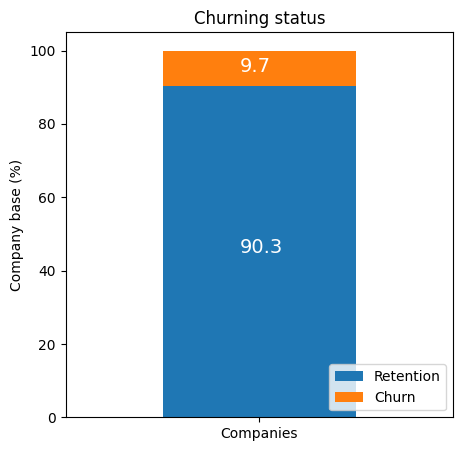

In [63]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

- About 10% of the total customers have churned. (This sounds about right)

### **Sales channel**

In [64]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

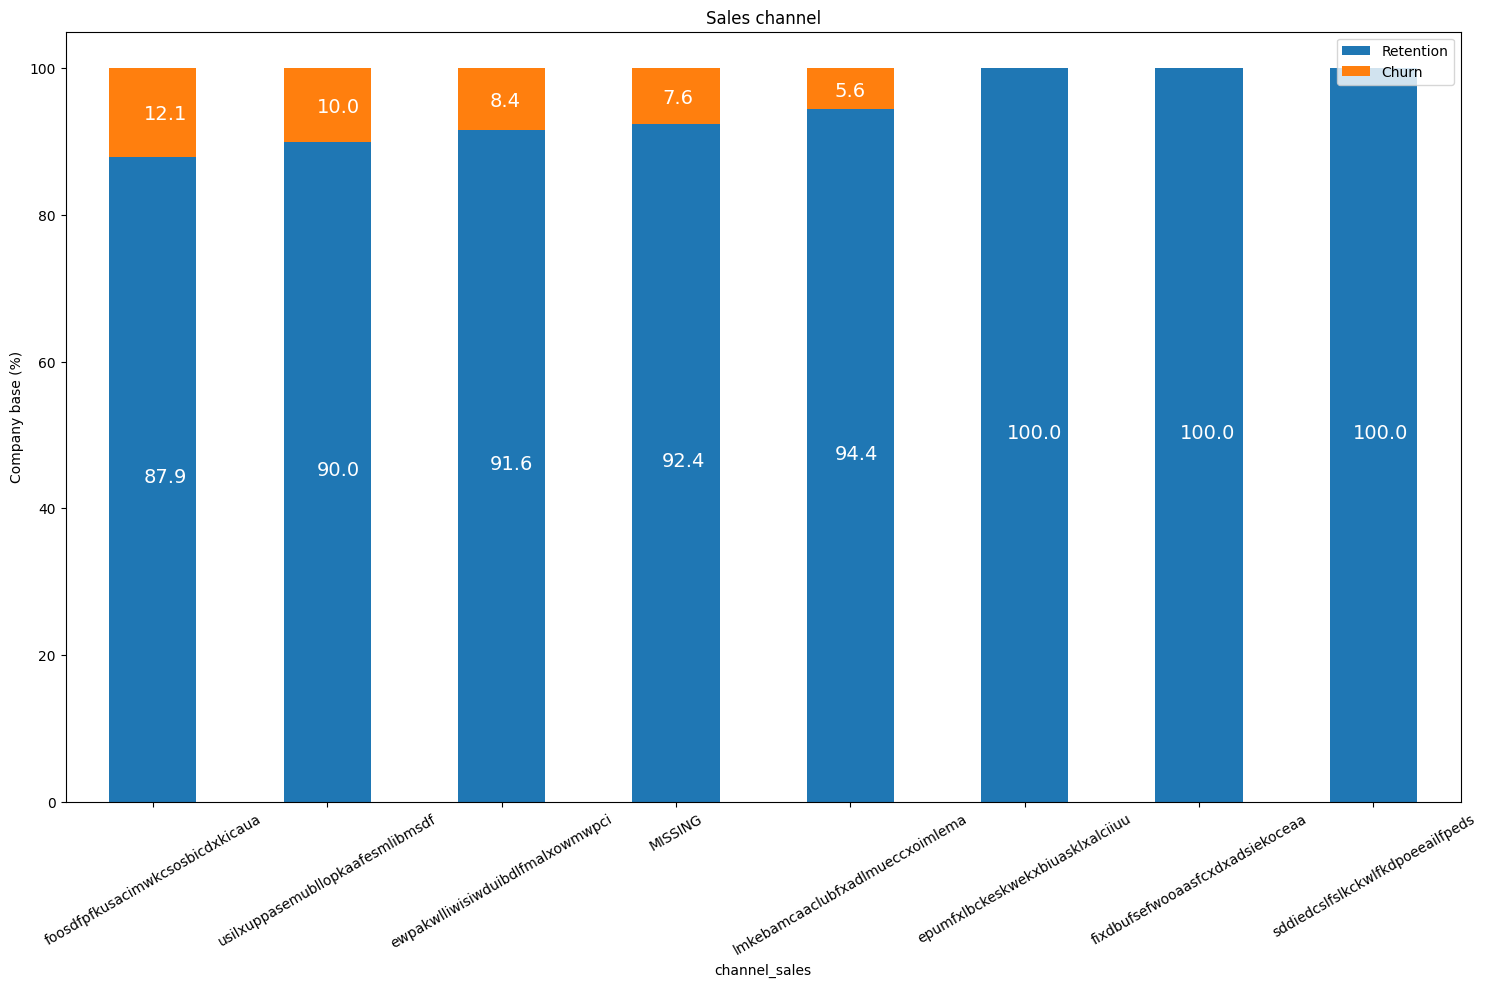

In [65]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

### **Consumption**

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [67]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [68]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

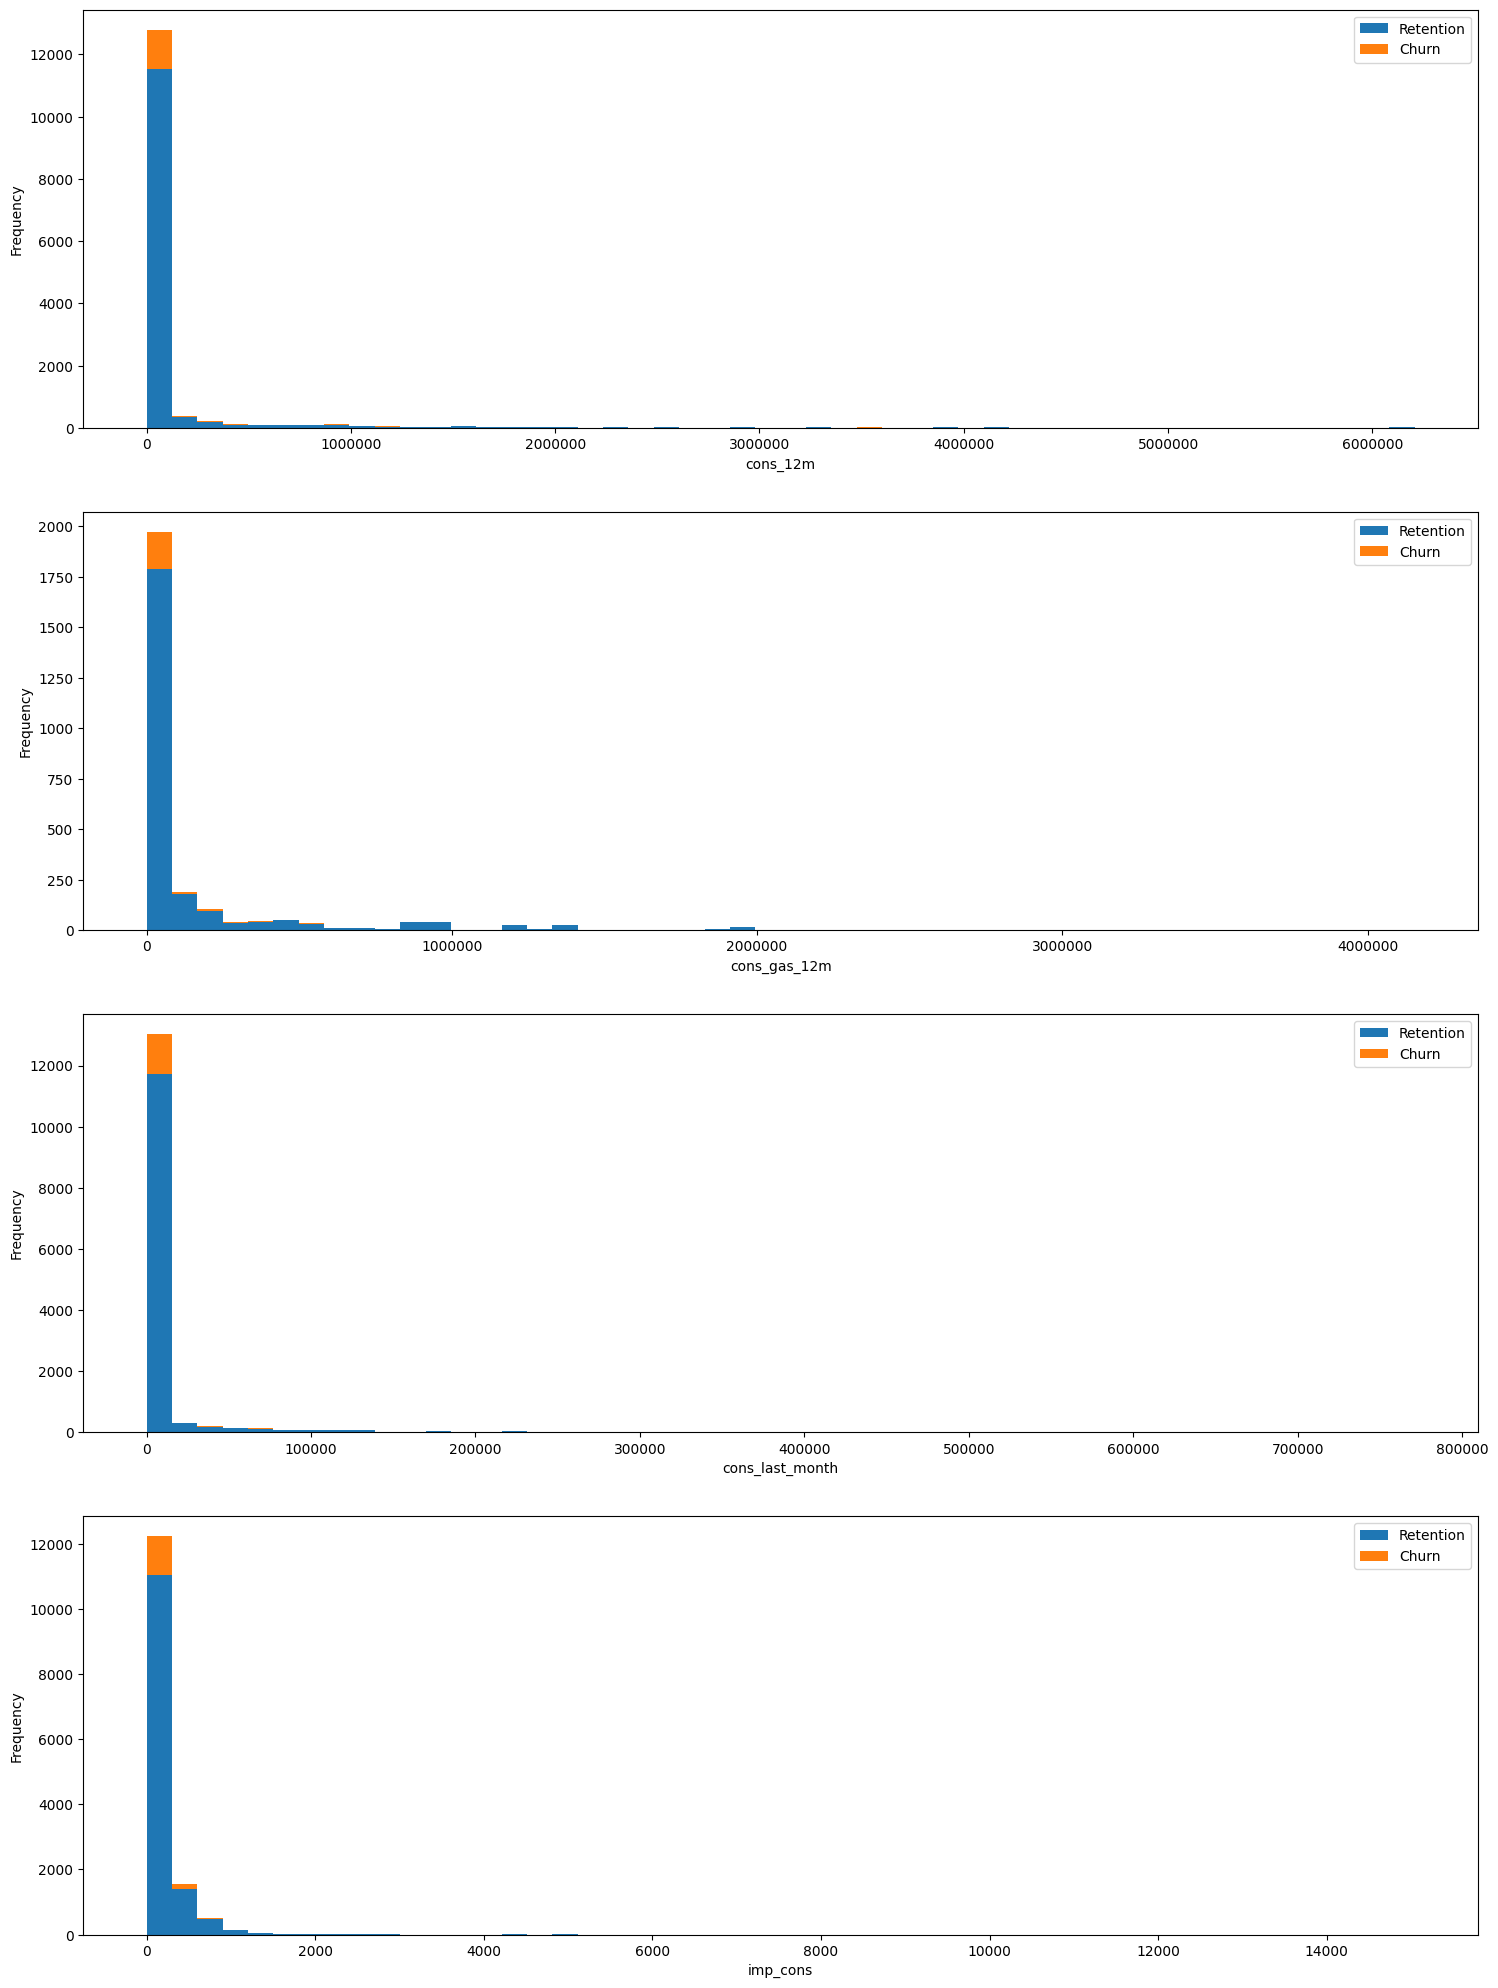

In [69]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers.

### **Margins**

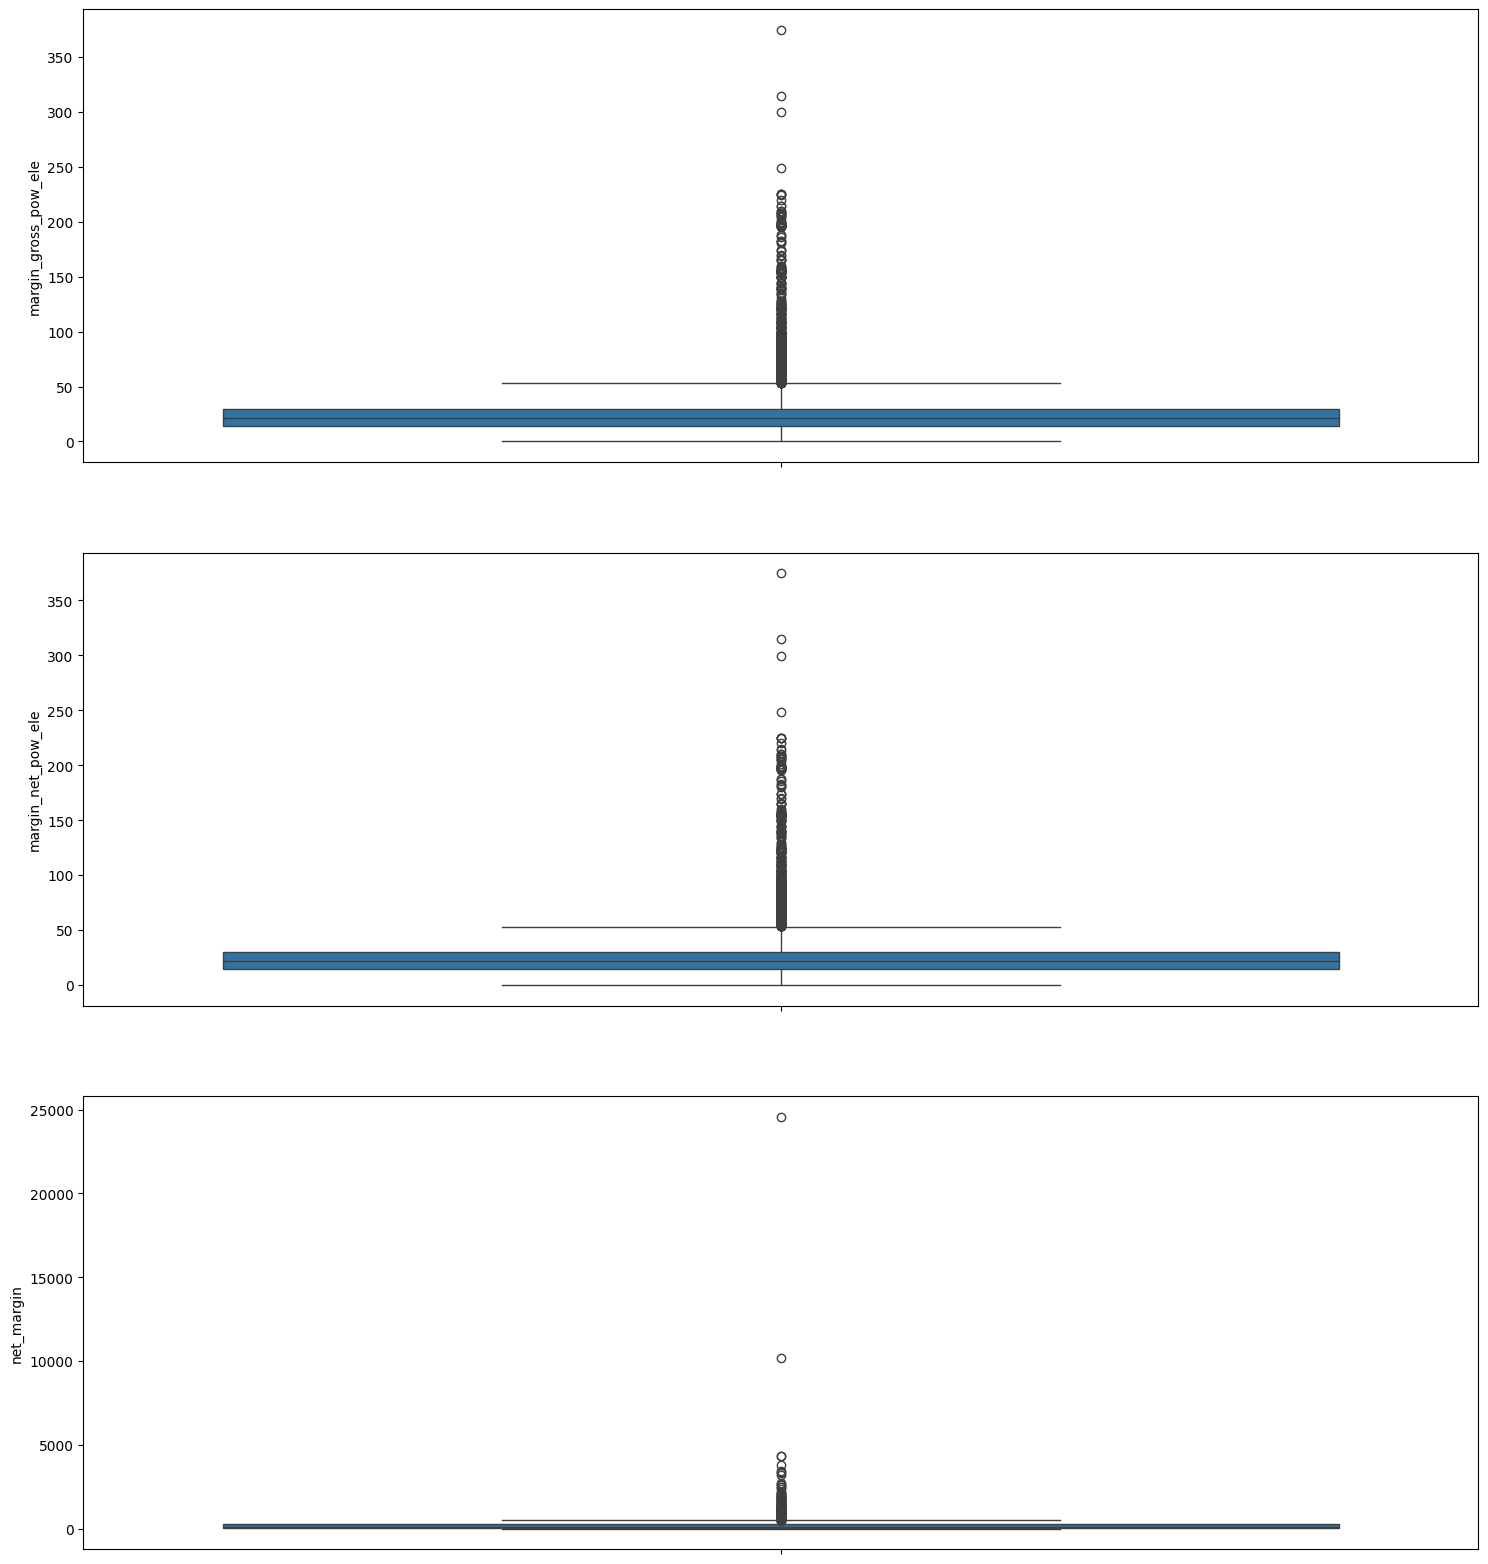

In [73]:
# Selecting the relevant columns
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

# Create subplots
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot boxplots
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"], ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

# Check if the axis uses ScalarFormatter before applying ticklabel_format
if isinstance(axs[0].xaxis.get_major_formatter(), plt.ScalarFormatter):
    axs[0].ticklabel_format(style='plain', axis='x')
if isinstance(axs[1].xaxis.get_major_formatter(), plt.ScalarFormatter):
    axs[1].ticklabel_format(style='plain', axis='x')
if isinstance(axs[2].xaxis.get_major_formatter(), plt.ScalarFormatter):
    axs[2].ticklabel_format(style='plain', axis='x')

plt.show()


## **Final Thoughts**

- In this Notebook we did Exploratory Data Analysis of `client_data.csv` and `price_data.csv` and finally visualized the data in various ways.